# 1 - IMPORTS

## 1.1 - Libraries

*Load required libraries for the project*

In [1]:
!pip install --upgrade -q pylangacq

In [2]:
!pip install catboost shap

In [1]:
pip install -U ydata-profiling

  Using cached ydata_profiling-4.0.0-py2.py3-none-any.whl (344 kB)
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 0.0.dev0
    Uninstalling ydata-profiling-0.0.dev0:
      Successfully uninstalled ydata-profiling-0.0.dev0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c conda-forge ipywidgets

In [1]:
# OS
import os
from   pathlib import Path

# import required libraries
#from google.colab import files

# date
from datetime import datetime

# data manipulation
import re
import numpy      as     np
import pandas     as     pd

# plot and images
import seaborn              as sns
import matplotlib.pyplot    as plt

# NLP 
import pylangacq
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag

# Generating Synthetic data
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# modelling
from sklearn.model_selection import train_test_split, LeavePOut, StratifiedKFold, learning_curve, cross_validate
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import log_loss, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, log_loss
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# explainability
import shap

In [2]:
# # download required corpus, POS, etc
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

## 1.2 - Functions

*Define functions that will be used on the project*

In [3]:
# TO-DO

## 1.3 - Setup

*Set some configurations for the whole project*

In [4]:
# e.g.     
# set cientific notation for pandas
pd.set_option(
    "display.float_format", "{:,.3f}".format 
)

## 1.4 - Constants 

*Define constants that will be used throughout the project*

In [5]:
# TO-DO

In [6]:
# define seed and random states
seed = 0

# 2 - DATA EXTRACTION

## 2.1 - Data dictionary

*Describe the meaning of every column of the dataset*

In [7]:
# TO-DO

## 2.2 - Data Loading

*Load data from required files*

In [8]:
# # upload data
# uploaded = files.upload()

In [9]:
# list files in colab folder
print(os.listdir("."))

['.ipynb_checkpoints', '.log', 'Available Sheets.png', 'Baseline_Dataset_EDA.ipynb', 'Datasets', 'data_analytics_model_on_behavioural_challenges_of_asd_kids.csv', 'data_csv.csv', 'Nadig.xlsx', 'Nadig_EDA.html', 'Omdena_ASD_Predictor_MVP_template - Copy.ipynb', 'Omdena_ASD_Predictor_MVP_template.ipynb', 'Research', 'Teamate', 'Toddler Autism dataset July 2018.csv', 'Toddler data description.docx', 'Toddler Proportion Comparison across Datasets.ipynb', 'your_report.html', 'Zoom Recordings']


In [10]:
nadig = pylangacq.read_chat( "Datasets/NLP/textual/Nadig.zip" )
nadig.n_files() # how many chat files are present for this data

38

In [11]:
# Gettting the high level information of the .cha files present in zip file
nadig.info(verbose=True)

38 files
9453 utterances
46271 words
       Utterance Count    Word Count  File Path
---  -----------------  ------------  -------------
#1                 292          1679  Nadig\101.cha
#2                 312          1512  Nadig\102.cha
#3                 230          1305  Nadig\103.cha
#4                 245          1076  Nadig\104.cha
#5                 180          1022  Nadig\108.cha
#6                 242          1462  Nadig\109.cha
#7                 231          1198  Nadig\110.cha
#8                 167          1143  Nadig\111.cha
#9                 197           857  Nadig\115.cha
#10                337          1941  Nadig\117.cha
#11                186           900  Nadig\119.cha
#12                173           670  Nadig\120.cha
#13                304          1879  Nadig\121.cha
#14                237          1397  Nadig\122.cha
#15                323          2010  Nadig\123.cha
#16                284          1207  Nadig\124.cha
#17                402         

In [12]:
nadig.ages(months=True)

[42.166666666666664,
 50.13333333333333,
 31.7,
 43.06666666666667,
 78.9,
 37.0,
 73.0,
 34.43333333333333,
 52.7,
 37.36666666666667,
 32.0,
 42.833333333333336,
 32.53333333333333,
 58.56666666666667,
 34.2,
 61.7,
 23.633333333333333,
 64.83333333333333,
 37.166666666666664,
 52.43333333333333,
 75.33333333333333,
 23.166666666666668,
 63.233333333333334,
 31.666666666666668,
 65.5,
 32.266666666666666,
 58.93333333333333,
 31.9,
 28.8,
 26.166666666666668,
 27.4,
 26.966666666666665,
 26.1,
 22.933333333333334,
 20.966666666666665,
 20.466666666666665,
 43.53333333333333,
 42.96666666666667]

In [13]:
# Get the toddlers age from the given files
# First it is extracted in months which is floating and then converted to integer

import math

child_age_float = nadig.ages(months=True)

child_age = [math.ceil(num) for num in child_age_float]

print(child_age) 


[43, 51, 32, 44, 79, 37, 73, 35, 53, 38, 32, 43, 33, 59, 35, 62, 24, 65, 38, 53, 76, 24, 64, 32, 66, 33, 59, 32, 29, 27, 28, 27, 27, 23, 21, 21, 44, 43]


In [14]:
# create an empty dataframe 
df_extraction = pd.DataFrame()

# iterate over transcripts
for nadig_i in nadig:
    # create a dictionary for extracted features
    features_dict = {}
    
    ####### add values to dataframe #######
    # add ASD label
    features_dict["ASD"] = nadig_i.headers()[0]["Participants"]["CHI"]["group"]
    
    # get age of the child in months
    features_dict["age_in_months"] = math.ceil(nadig_i.ages(months=True)[0])
    
    # get non-child participants tags
    non_child_participants = list(nadig_i.headers()[0]["Participants"].keys())
    non_child_participants.remove('CHI')

    # get mlu
    child_mlu = nadig_i.mlu(participant='CHI')[0]    
    # get mean mlu for non-child participants
    mean_mlu_non_child = np.mean([nadig_i.mlu(participant=non_child)[0] 
                                  for non_child 
                                  in non_child_participants])
    # add child mlu
    features_dict["child_mlu"] = child_mlu
    # get percentage of child mlu / non-child mean mlu
    features_dict["percent_child_parents_mlu"] = child_mlu / mean_mlu_non_child

    # get mluw
    child_mluw = nadig_i.mluw(participant='CHI')[0]
    # get mean mluw for non-child participants
    mean_mluw_non_child = np.mean([nadig_i.mluw(participant=non_child)[0] 
                                   for non_child 
                                   in non_child_participants])
    # add child mluw
    features_dict["child_mluw"] = child_mluw
    # get percentage of child mluw / non-child mean mluw
    features_dict["percent_child_parents_mluw"] = child_mluw / mean_mluw_non_child

    # get ttr
    child_ttr = nadig_i.ttr(participant='CHI')[0]
    # get mean ttr for non-child participants
    mean_ttr_non_child = np.mean([nadig_i.ttr(participant=non_child)[0] 
                                  for non_child 
                                  in non_child_participants])
    # add child ttr
    features_dict["child_ttr"] = child_ttr
    # get percentage of child ttr / non-child mean ttr
    features_dict["percent_child_parents_ttr"] = child_ttr / mean_ttr_non_child

    # get ipsyn
    child_ipsyn = nadig_i.ipsyn(participant='CHI')[0]
    # get mean ipsyn for non-child participants
    mean_ipsyn_non_child = np.mean([nadig_i.ipsyn(participant=non_child)[0] 
                                    for non_child 
                                    in non_child_participants])
    # add child ipsyn
    features_dict["child_ipsyn"] = child_ipsyn
    # get percentage of child ipsyn / non-child mean ipsyn
    features_dict["percent_child_parents_ipsyn"] = child_ipsyn / mean_ipsyn_non_child

    # get number of words
    features_dict["child_num_words"] = len(nadig_i.words(participants="CHI"))
    # get percentage of child words / parent words
    features_dict["perct_child_parents_words"] = len(nadig_i.words(participants="CHI")) / len(nadig_i.words(exclude=("CHI")))
    # get number of unique words
    features_dict["child_num_unique_words"] = len(set(nadig_i.words(participants="CHI")))
    # get percentage of child unique words / parent unique words
    features_dict["perct_child_parents_unique_words"] = len(set(nadig_i.words(participants="CHI"))) / len(set(nadig_i.words(exclude=("CHI"))))
    # get number of tokens
    features_dict["child_num_tokens"] = len(nadig_i.tokens(participants="CHI"))
    # get percentage of child tokens / parent tokens
    features_dict["perct_child_parents_tokens"] = len(nadig_i.tokens(participants="CHI")) / len(nadig_i.tokens(exclude=("CHI")))
    # get number of utterances
    features_dict["child_utterances"] = len(nadig_i.utterances(participants="CHI"))
    # get percentage of child utterances / parent utterances
    features_dict["perct_child_parents_utterances"] = len(nadig_i.utterances(participants="CHI")) / len(nadig_i.utterances(exclude="CHI"))

    # get part of speech (POS) for every token in child utterances
    child_pos = [token.pos for token in nadig_i.tokens(participants="CHI")]   
    # get number of tokens
    num_tokens = features_dict["child_num_tokens"]
    # sanity check
    assert num_tokens == len(child_pos), "Missing POS tags!"
    
    # get values counts for pos
    pos_value_counts = pd.Series(child_pos).value_counts(dropna=False)
    # convert to dict
    pos_value_counts_dict = pos_value_counts.to_dict()
    # add pos_ prefix before pos tags
    pos_value_counts_dict = { ("pos_percent_" + str(k)): (v / num_tokens) for k, v in pos_value_counts_dict.items() }
    # sanity check 
    assert abs(1 - sum([*pos_value_counts_dict.values()])) < 0.01, "Missing POS tags!"
    
    # add pos_value_counts_dict to features_dict
    features_dict = {**features_dict, **pos_value_counts_dict}
    # create a pandas dataframe from features dict
    df_features = pd.DataFrame(data=features_dict, index=[0])
    # concatenate features dataframe with extraction dataframe
    df_extraction = pd.concat(objs=[df_extraction, df_features], ignore_index=True)

# inspect dataframe
display(df_extraction.columns.tolist(), df_extraction.sample(7))

['ASD',
 'age_in_months',
 'child_mlu',
 'percent_child_parents_mlu',
 'child_mluw',
 'percent_child_parents_mluw',
 'child_ttr',
 'percent_child_parents_ttr',
 'child_ipsyn',
 'percent_child_parents_ipsyn',
 'child_num_words',
 'perct_child_parents_words',
 'child_num_unique_words',
 'perct_child_parents_unique_words',
 'child_num_tokens',
 'perct_child_parents_tokens',
 'child_utterances',
 'perct_child_parents_utterances',
 'pos_percent_co',
 'pos_percent_.',
 'pos_percent_None',
 'pos_percent_n',
 'pos_percent_v',
 'pos_percent_!',
 'pos_percent_pro:sub',
 'pos_percent_adv',
 'pos_percent_neg',
 'pos_percent_qn',
 'pos_percent_?',
 'pos_percent_prep',
 'pos_percent_mod',
 'pos_percent_pro:per',
 'pos_percent_pro:dem',
 'pos_percent_adj',
 'pos_percent_pro:rel',
 'pos_percent_det:art',
 'pos_percent_pro:int',
 'pos_percent_aux',
 'pos_percent_cop',
 'pos_percent_+...',
 'pos_percent_inf',
 'pos_percent_conj',
 'pos_percent_coord',
 'pos_percent_+!?',
 'pos_percent_post',
 'pos_perce

,ASD,age_in_months,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
30,TYP,28,1.952,0.341,1.382,0.302,0.438,1.827,42,0.494,...,NaN,NaN,NaN,NaN,0.042,NaN,NaN,NaN,NaN,NaN
0,TYP,43,2.641,0.398,2.604,0.472,0.558,2.215,61,0.701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,ASD,43,2.568,0.651,1.816,0.626,0.435,1.465,20,0.328,...,NaN,NaN,NaN,NaN,0.009,NaN,NaN,NaN,NaN,NaN
37,TYP,43,3.742,0.648,2.982,0.679,0.494,1.639,55,0.733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ASD,73,3.625,0.639,3.410,0.793,0.526,2.072,53,0.654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,TYP,21,1.096,0.224,1.000,0.249,0.733,2.632,4,0.059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075,NaN
17,ASD,65,1.389,0.317,1.125,0.320,0.254,1.144,15,0.197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# print(
#     len(nadig.mlu(participant='CHI')),
#     len(nadig.mluw(participant='CHI'))
#         )

# # tagged_words -> Deprecated since version 0.13.0: Please use tokens() with by_utterances=False instead.
# # tokens(participants=None, exclude=None, by_utterances=False, by_files=False) → Union[List[pylangacq.objects.Token], List[List[pylangacq.objects.Token]], List[List[List[pylangacq.objects.Token]]]]
# # ttr(keep_case=True, participant='CHI') → List[float
# # utterances(participants=None, exclude=None, by_files=False) → Union[List[pylangacq.objects.Utterance], List[List[pylangacq.objects.Utterance]]]
# # ipsyn(participant='CHI') → List[int][source] -> Return the indexes of productive syntax (IPSyn).

In [16]:
# nadig_utterance = nadig.utterances(by_files = True) # get all the utterrance of the chat files of Nadig chat data
# print(len(nadig_utterance))
# nadig_utterance[0][0] # describe the first utterrance in the first conversation.

In [17]:
# first_utter = nadig_utterance[0][0]
# participant = first_utter.participant #Get participant name of the utterrance
# list_of_tokens = first_utter.tokens #Get the tokens of the utterrance

# print(f'Participant: {participant}')
# print(f'Tokens: ')
# #Let's anaylyse each token
# for i, token in enumerate(list_of_tokens):
#   print(f'token {i+1}: {token}')
#   token_word = token.word #extract the word of token
#   print(f'\t token word: {token_word}')
#   token_pos = token.pos #get the parts of speech of the token
#   print(f'\t token pos: {token_pos}')
#   token_mor = token.mor #get the morphological information of the token
#   print(f'\t token mor: {token_mor}')
#   token_gra = token.gra #get the grammatical info. of the token
#   print(f'\t token gra: {token_gra}: {token_gra.dep} | {token_gra.head} | {token_gra.rel}')

In [18]:
# tier = first_utter.tiers #tier is a dictionary that contains the utterrance, %mor and %gra info in a summarised form
# print(tier)
# utter_sentence = tier[participant] #get the dialogue sentence
# print(f'sentence: {utter_sentence}')
# morphological_info = tier['%mor'] #get the morphological info of all the words
# print(f'%mor: {morphological_info}')
# grammatical_info = tier['%gra'] #get the grammatical relation info of all the words
# print(f'%gra: {grammatical_info}')
     

In [19]:
# # instanciate an empty dataframe
# df_extraction = pd.DataFrame(columns=["participant", "sentence", "csv"])

# # iterate over files and get names from csv files
# csv_files = [file for file in os.listdir(".") if file.endswith(".csv")]

# # iterate over csv names
# for csv in csv_files:
#     # read csv data
#     df_ = pd.read_csv(csv)
#     # create a new row to indicate source origin
#     df_["csv"] = int(csv[:-4])
#     # concatenate csv data to main dataframe    
#     df_extraction = pd.concat(objs=[df_, df_extraction])

# # print unique participants and a sample of dataframe
# print(f'Unique participants: {df_extraction["participant"].unique()}')
# display(df_extraction.sample(10, random_state=7))

# 3 - DATA DESCRIPTION

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [20]:
# create a restore point for the previous section dataframe
df_description = df_extraction.copy()

# check dataframe
df_description.sample(3)

,ASD,age_in_months,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
5,TYP,37,4.358,0.634,3.672,0.665,0.443,1.496,77,0.885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,TYP,24,1.051,0.218,1.000,0.255,1.000,4.445,3,0.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024,NaN
22,ASD,64,1.444,0.269,1.344,0.324,0.512,3.007,37,0.597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2 - Column Names

*Search for misleading or error-prone column names*

In [21]:
# check column names
df_description.columns

Index(['ASD', 'age_in_months', 'child_mlu', 'percent_child_parents_mlu',
       'child_mluw', 'percent_child_parents_mluw', 'child_ttr',
       'percent_child_parents_ttr', 'child_ipsyn',
       'percent_child_parents_ipsyn', 'child_num_words',
       'perct_child_parents_words', 'child_num_unique_words',
       'perct_child_parents_unique_words', 'child_num_tokens',
       'perct_child_parents_tokens', 'child_utterances',
       'perct_child_parents_utterances', 'pos_percent_co', 'pos_percent_.',
       'pos_percent_None', 'pos_percent_n', 'pos_percent_v', 'pos_percent_!',
       'pos_percent_pro:sub', 'pos_percent_adv', 'pos_percent_neg',
       'pos_percent_qn', 'pos_percent_?', 'pos_percent_prep',
       'pos_percent_mod', 'pos_percent_pro:per', 'pos_percent_pro:dem',
       'pos_percent_adj', 'pos_percent_pro:rel', 'pos_percent_det:art',
       'pos_percent_pro:int', 'pos_percent_aux', 'pos_percent_cop',
       'pos_percent_+...', 'pos_percent_inf', 'pos_percent_conj',
       'pos

## 3.3 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [22]:
# check data types
df_description.dtypes

ASD                           object
age_in_months                  int64
child_mlu                    float64
percent_child_parents_mlu    float64
child_mluw                   float64
                              ...   
pos_percent_chi              float64
pos_percent_pro:poss         float64
pos_percent_n:let            float64
pos_percent_bab              float64
pos_percent_sing             float64
Length: 71, dtype: object

## 3.4 - Check Duplicated Rows

*Inspect duplicated rows (based on dataframe granularity) and handle them properly*

In [23]:
# TO-DO

## 3.5 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [24]:
# check NAs
df_description.isna().sum()

ASD                           0
age_in_months                 0
child_mlu                     0
percent_child_parents_mlu     0
child_mluw                    0
                             ..
pos_percent_chi              33
pos_percent_pro:poss         34
pos_percent_n:let            37
pos_percent_bab              36
pos_percent_sing             37
Length: 71, dtype: int64

## 3.6 - Handle Missing Values

*Handle missing value for columns*

In [25]:
# fill missing values with 0
df_description = df_description.fillna(value=0)

In [26]:
# sanity check
assert df_description.isna().sum().sum() == 0, "There are missing values!"

# 4 - FEATURE ENGINEERING

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [27]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
df_f_eng.sample(3)

,ASD,age_in_months,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
16,TYP,24,1.333,0.317,1.074,0.331,0.397,1.487,10,0.145,...,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000
33,TYP,23,1.083,0.215,1.000,0.253,1.000,3.801,1,0.014,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,TYP,53,3.341,0.745,3.183,0.873,0.518,1.161,56,0.767,...,0.000,0.007,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.000


## 4.2 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

In [28]:
# # create ASD label
# # odd csv = TYP
# # even csv = ASD
# df_f_eng["label"] = df_f_eng["csv"].apply(lambda x: "ASD" if (x % 2 == 0) else "TYP")

# # check operation
# df_f_eng.sample(5, random_state=0)

In [29]:
# # split sentence into [".", "!", "?", ","]
# df_f_eng["clean_sentence"] = df_f_eng["sentence"].apply(
#     lambda sentence: re.split(f"[,.!? ]+", sentence)
#     )
# # inspect transformation
# display('split sentence into [".", "!", "?", ","]', df_f_eng["clean_sentence"].head(3))
# print("\n\n")

# # remove any spaces with regex
# df_f_eng["clean_sentence"] = df_f_eng["clean_sentence"].apply(
#     lambda sentence_list: [re.sub("\s+", "", item) for item in sentence_list] 
#     )
# # inspect transformation
# display('remove any spaces with regex', df_f_eng["clean_sentence"].head(3))
# print("\n\n")

# # lower the case of the words in a text
# df_f_eng["clean_sentence"] = df_f_eng["clean_sentence"].apply(
#     lambda sentence_list: [item.lower() for item in sentence_list] 
#     )
# # inspect transformation
# display('lower the case of the words in a text', df_f_eng["clean_sentence"].head(3))
# print("\n\n")

# # remove empty tokens
# df_f_eng["clean_sentence"] = df_f_eng["clean_sentence"].apply(
#     lambda sentence_list: [item for item in sentence_list if item != ""] 
#     )
# # inspect transformation
# display('remove empty tokens', df_f_eng["clean_sentence"].head(3))
# print("\n\n")

# # instanciate lemmatizer
# lemmatizer = WordNetLemmatizer()

# # lemmatize tokens
# df_f_eng["clean_sentence"] = df_f_eng["clean_sentence"].apply(
#     lambda sentence_list: [lemmatizer.lemmatize(item) for item in sentence_list] 
#     )
# # inspect transformation
# display('lemmatize tokens', df_f_eng["clean_sentence"].head(3))
# print("\n\n")

# # NLTK part of speech
# # https://www.nltk.org/book/ch05.html
# # https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
# # ADJ 	adjective 	new, good, high, special, big, local
# # ADP 	adposition 	on, of, at, with, by, into, under
# # ADV 	adverb 	really, already, still, early, now
# # CONJ 	conjunction 	and, or, but, if, while, although
# # DET 	determiner, article 	the, a, some, most, every, no, which
# # NOUN 	noun 	year, home, costs, time, Africa
# # NUM 	numeral 	twenty-four, fourth, 1991, 14:24
# # PRT 	particle 	at, on, out, over per, that, up, with
# # PRON 	pronoun 	he, their, her, its, my, I, us
# # VERB 	verb 	is, say, told, given, playing, would
# # . 	punctuation marks 	. , ; !
# # X 	other 	ersatz, esprit, dunno, gr8, univeristy

# # define POS tags
# pos_tags = [
#     "JJ", # adj
#     "NN", # noun
#     "RB", # adverb
#     "VB" # verbs
# ]

# # iterate over tags
# for idx, tag in enumerate(pos_tags):

#     # check apply POS to each word (word, POS)
#     # and return the POS per row
#     df_f_eng[f"pos_tag_{tag}"] = df_f_eng["clean_sentence"].apply( 
#         lambda sentence_list: [ word for word, pos in pos_tag(sentence_list) if pos == tag]
#     )
    
#     # inspect the first transformation
#     if idx == 0: 
#         display('apply POS tags', df_f_eng[f"pos_tag_{tag}"].head(3))
#         print("\n\n")

#     # get total number of tags
#     df_f_eng[f"num_pos_tag_{tag}"] = df_f_eng[f"pos_tag_{tag}"].apply(lambda tags_list: len(tags_list))
#     # inspect the first transformation
#     if idx == 0: 
#         display('count number of POS tags', df_f_eng[f"pos_tag_{tag}"].head(3))
#         print("\n\n")

# # inspect results
# print("*"*49)
# df_f_eng.sample(10)

In [30]:
# # get number of tokens
# df_f_eng["num_tokens"] = df_f_eng["clean_sentence"].apply(lambda sentence_list: len(sentence_list))

# # get number of chars
# df_f_eng["num_chars"] = df_f_eng["clean_sentence"].apply(lambda sentence_list: len("".join(sentence_list)))

# # inspect results
# df_f_eng.sample(10)

In [31]:
# # create a empty dataframe to hold modelling data
# df_modelling = pd.DataFrame()

# # define features to model
# features = ["num_pos_tag_JJ", "num_pos_tag_NN", "num_pos_tag_RB", "num_pos_tag_VB", "num_tokens", "num_chars"]

# # get unique csv (childs)
# for idx, child in enumerate(df_f_eng["csv"].unique().tolist()):
#     # filter dataframe to the given child
#     df_child = df_f_eng[df_f_eng["csv"] == child]

#     # extract label
#     label = df_child["label"].unique().tolist()[0]

#     # groupby participant and create features per participant
#     df_agg = df_child.groupby("participant", as_index=False).agg(
#         sum_num_pos_tag_JJ = ("num_pos_tag_JJ", "sum"), 
#         mean_num_pos_tag_JJ = ("num_pos_tag_JJ", "mean"), 
#         std_num_pos_tag_JJ = ("num_pos_tag_JJ", "std"),
#         sum_num_pos_tag_NN = ("num_pos_tag_NN", "sum"),
#         mean_num_pos_tag_NN = ("num_pos_tag_NN", "mean"),
#         std_num_pos_tag_NN = ("num_pos_tag_NN", "std"), 
#         sum_num_pos_tag_RB = ("num_pos_tag_RB", "sum"),
#         mean_num_pos_tag_RB = ("num_pos_tag_RB", "mean"),
#         std_num_pos_tag_RB = ("num_pos_tag_RB", "std"), 
#         sum_num_pos_tag_VB = ("num_pos_tag_VB", "sum"),
#         mean_num_pos_tag_VB = ("num_pos_tag_VB", "mean"),
#         std_num_pos_tag_VB = ("num_pos_tag_VB", "std"),
#         sum_num_tokens = ("num_tokens", "sum"), 
#         mean_num_tokens = ("num_tokens", "mean"), 
#         std_num_tokens = ("num_tokens", "std"), 
#         sum_num_chars = ("num_chars", "sum"),
#         mean_num_chars = ("num_chars", "mean"),
#         std_num_chars = ("num_chars", "std")
#         )
#     # inspect aggregation dataframe
#     if idx == 0: 
#         display("df_agg just after aggregation", df_agg.head(3))
#         print("\n\n")

#     # iterate over pre-defined features
#     for feature in features:
#         # for each feature, create a percentage number of child / (child + parent)
#         df_agg[f"percent_child_total_of_{feature[-2:]}"] = df_agg.loc[df_agg["participant"] == "CHI", f"sum_{feature}"] / df_agg[f"sum_{feature}"].sum()
#     # inspect aggregation dataframe
#     if idx == 0: 
#         display("df_agg just after precent columns creation", df_agg.head(3))
#         print("\n\n")

#     # filter dataframe to only child features
#     df_child_features = df_agg[df_agg["participant"] == "CHI"]
#     # inspect aggregation dataframe
#     if idx == 0: 
#         display("df_agg just after CHI filtering", df_agg.head(3))
#         print("\n\n")

#     # define label
#     df_child_features["label"] = label
#     df_child_features["csv"] = child

#     # append child features to modelling dataframe
#     df_modelling = pd.concat(objs=[df_modelling, df_child_features], ignore_index=True)
#     # inspect modelling dataframe
#     if idx == 0: 
#         display("df_modelling just after concatenation", df_modelling.head(3))
#         print("\n\n")

# # inspect results
# print("*"*49)
# df_modelling

In [32]:
# # reassing section dataframe
# df_f_eng = df_modelling

# 5 - DATA FILTERING

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [33]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
df_filter.sample(3)

,ASD,age_in_months,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
13,ASD,59,4.392,0.611,3.621,0.640,0.467,1.507,74,0.892,...,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000
32,TYP,27,2.606,0.509,2.308,0.569,0.500,1.051,45,0.616,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,ASD,51,1.105,0.218,1.000,0.265,0.500,2.556,2,0.026,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## 5.2 - Rows Filtering

*Remove rows with meaningless (or unimportant) data*

In [34]:
# TO-DO

## 5.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

In [35]:
# TO-DO

# 6 - Exploratory Data Analysis

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [36]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
df_eda.sample(3)

,ASD,age_in_months,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
21,TYP,24,1.051,0.218,1.000,0.255,1.000,4.445,3,0.043,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.024,0.000
13,ASD,59,4.392,0.611,3.621,0.640,0.467,1.507,74,0.892,...,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000
17,ASD,65,1.389,0.317,1.125,0.320,0.254,1.144,15,0.197,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [37]:
df_eda

,ASD,age_in_months,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
0,TYP,43,2.641,0.398,2.604,0.472,0.558,2.215,61,0.701,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,ASD,51,1.105,0.218,1.000,0.265,0.500,2.556,2,0.026,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,TYP,32,3.158,0.449,2.719,0.501,0.394,1.218,57,0.606,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,ASD,44,2.394,0.462,1.979,0.488,0.527,1.905,40,0.519,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ASD,79,5.213,0.841,4.023,0.832,0.421,0.972,81,0.931,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,TYP,37,4.358,0.634,3.672,0.665,0.443,1.496,77,0.885,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,ASD,73,3.625,0.639,3.410,0.793,0.526,2.072,53,0.654,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,TYP,35,7.855,1.203,6.642,1.277,0.326,0.834,74,0.881,...,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,TYP,53,3.341,0.745,3.183,0.873,0.518,1.161,56,0.767,...,0.000,0.007,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.000
9,TYP,38,3.976,0.581,2.807,0.523,0.391,1.597,71,0.826,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [38]:
from ydata_profiling import ProfileReport

In [39]:
# Generate the Profiling Report
profile = ProfileReport(
    df_eda, title="Exploratory Data Analysis", html={"style": {"full_width": True}}, sort=None
)

In [40]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Generate our EDA in a HTML File
profile.to_file("Nadig_EDA.html")

## 6.2 - Univariate Analysis

*Check the distribution of variables taking into account their data types*

### 6.2.1 - Numeric Variables

In [ ]:
# TO-DO

### 6.2.2 - Categorical Variables

In [ ]:
# TO-DO

### 6.2.3 - Time Variables

In [ ]:
# TO-DO

## 6.3 - Bivariate Analysis

*Check the correlation among variables*

### 6.3.1 - Numeric vs Numeric Variables

In [ ]:
# TO-DO

### 6.3.2 - Categorical vs Categorical Variables

In [ ]:
# TO-DO

### 6.3.3 - Numerical vs Categorical Variables

In [ ]:
# TO-DO

# 7 - Synthetic Data

*Do we need to create synthetic data?*

*Is it possible to create synthetic data for this problem?*

*What are the pros and cons of synthetic data?*

*Techniques*:
- oversampling
- undersampling
- SMOTE
- model loss function weighting

In [ ]:
# TO-DO

# 8 Data Preparation

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
df_prep.sample(3)

,ASD,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
5,TYP,4.358,0.634,3.672,0.665,0.443,1.496,77,0.885,332,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,TYP,1.333,0.317,1.074,0.331,0.397,1.487,10,0.145,205,...,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000
2,TYP,3.158,0.449,2.719,0.501,0.394,1.218,57,0.606,233,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# define X and y data
X = df_prep.drop(columns=["ASD"])
y = df_prep["ASD"]

# map labels
y = y.map({"ASD": 1, "TYP": 0})

# check X and y
display("X data", X.head(), "y data", y.head())

'X data'

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
0,2.641,0.398,2.604,0.472,0.558,2.215,61,0.701,212,0.155,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.105,0.218,1.000,0.265,0.500,2.556,2,0.026,21,0.015,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3.158,0.449,2.719,0.501,0.394,1.218,57,0.606,233,0.238,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2.394,0.462,1.979,0.488,0.527,1.905,40,0.519,165,0.193,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,5.213,0.841,4.023,0.832,0.421,0.972,81,0.931,462,0.918,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


'y data'

0    0
1    1
2    0
3    1
4    1
Name: ASD, dtype: int64

## 8.2 - Train-validation-test split

In [ ]:
# define ratio of test split ratio 
test_ratio = 0.2 

# Train-Test split for the whole dataset
# X: attributes
# y: labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_ratio, random_state=seed, 
                                                    shuffle=True, stratify=y)

# reset index after train test split
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# check dataframes
print(
    f"Y stratification: {y.mean():.2f}%\n"
    f"y_train stratification: {y_train.mean():.2f}%\n"
    f"y_test stratification: {y_test.mean():.2f}%\n\n"
    f"X_train proportion: {(len(X_train) / len(X))*100:.2f}% of whole dataset\n"
    f"y_train proportion: {(len(y_train) / len(y))*100:.2f}% of whole dataset\n\n"
    f"X_test proportion: {(len(X_test) / len(X))*100:.2f}% of whole dataset\n"    
    f"y_test proportion: {(len(y_test) / len(y))*100:.2f}% of whole dataset\n"
)

# check dataframes
display(
    "X_train", X_train.shape, X_train.head(3), 
    "y_train", y_train.shape, y_train.head(3), 
    "X_test", X_test.shape, X_test.head(3), 
    "y_test", y_test.shape, y_test.head(3)
)

Y stratification: 0.34%
y_train stratification: 0.33%
y_test stratification: 0.38%

X_train proportion: 78.95% of whole dataset
y_train proportion: 78.95% of whole dataset

X_test proportion: 21.05% of whole dataset
y_test proportion: 21.05% of whole dataset



'X_train'

(30, 69)

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
0,3.067,0.503,3.316,0.694,0.397,1.491,18,0.212,94,0.095,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2.630,0.371,2.254,0.396,0.479,2.042,43,0.531,234,0.217,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2.640,0.558,2.060,0.549,0.274,0.910,44,0.629,380,0.483,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


'y_train'

(30,)

0    1
1    0
2    0
Name: ASD, dtype: int64

'X_test'

(8, 69)

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
0,2.568,0.651,1.816,0.626,0.435,1.465,20,0.328,115,0.221,...,0.000,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000
1,7.855,1.203,6.642,1.277,0.326,0.834,74,0.881,534,0.947,...,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,4.735,0.813,3.419,0.765,0.321,1.289,65,0.915,425,0.532,...,0.000,0.002,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000


'y_test'

(8,)

0    1
1    0
2    0
Name: ASD, dtype: int64

## 8.3 - Scaling

In [ ]:
# TO-DO

In [ ]:
# define scaler object
ss = StandardScaler(copy=True, with_mean=True, with_std=True)

# fit to data and get scaled dataframe
X_train_scaled = pd.DataFrame(data=ss.fit_transform(X_train), columns=X_train.columns)

# inspect values
display("X_train", X_train.head(), "X_train_scaled", X_train_scaled.head())

'X_train'

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
0,3.067,0.503,3.316,0.694,0.397,1.491,18,0.212,94,0.095,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2.630,0.371,2.254,0.396,0.479,2.042,43,0.531,234,0.217,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2.640,0.558,2.060,0.549,0.274,0.910,44,0.629,380,0.483,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3.629,0.497,2.598,0.431,0.445,1.920,66,0.742,372,0.266,...,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000
4,1.333,0.317,1.074,0.331,0.397,1.487,10,0.145,205,0.197,...,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000


'X_train_scaled'

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
0,0.156,0.010,0.915,0.764,-0.428,-0.274,-1.029,-1.107,-1.027,-0.804,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
1,-0.183,-0.614,-0.077,-0.541,0.013,0.354,-0.048,-0.040,-0.016,-0.351,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
2,-0.176,0.268,-0.259,0.127,-1.090,-0.936,-0.009,0.287,1.037,0.641,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
3,0.594,-0.020,0.244,-0.388,-0.168,0.215,0.854,0.665,0.980,-0.169,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,1.828,0.000,-0.237,0.000
4,-1.194,-0.871,-1.180,-0.829,-0.430,-0.279,-1.343,-1.331,-0.226,-0.426,...,0.000,-0.333,-0.262,-0.186,-0.220,3.135,-0.244,0.000,-0.237,0.000


In [ ]:
# inspect statistics
display("X_train", X_train.describe(), "X_train_scaled", X_train_scaled.describe())

'X_train'

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,2.866,0.501,2.337,0.520,0.476,1.731,44.233,0.543,236.267,0.311,...,0.000,0.001,0.000,0.000,0.002,0.001,0.000,0.000,0.003,0.000
std,1.306,0.215,1.088,0.232,0.189,0.893,25.919,0.304,140.931,0.273,...,0.000,0.002,0.001,0.001,0.008,0.001,0.001,0.000,0.014,0.000
min,1.000,0.198,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.012,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.571,0.322,1.353,0.321,0.397,1.148,22.750,0.282,139.250,0.153,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.853,0.506,2.437,0.532,0.455,1.552,49.500,0.623,220.000,0.224,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,3.774,0.638,3.165,0.675,0.517,2.028,63.250,0.752,362.750,0.415,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,5.448,1.049,4.023,0.978,1.000,4.445,81.000,0.931,462.000,1.089,...,0.000,0.007,0.003,0.003,0.042,0.005,0.007,0.000,0.075,0.000


'X_train_scaled'

,child_mlu,percent_child_parents_mlu,child_mluw,percent_child_parents_mluw,child_ttr,percent_child_parents_ttr,child_ipsyn,percent_child_parents_ipsyn,child_num_words,perct_child_parents_words,...,pos_percent_sub#n,pos_percent_n:pt,pos_percent_pro:refl,pos_percent_un#part,pos_percent_L2,pos_percent_chi,pos_percent_pro:poss,pos_percent_n:let,pos_percent_bab,pos_percent_sing
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,...,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,...,0.000,1.017,1.017,1.017,1.017,1.017,1.017,0.000,1.017,0.000
min,-1.453,-1.430,-2.185,-2.279,-2.564,-1.973,-1.736,-1.815,-1.683,-1.114,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
25%,-1.008,-0.844,-0.920,-0.870,-0.430,-0.664,-0.843,-0.871,-0.700,-0.588,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
50%,-0.010,0.023,0.094,0.053,-0.115,-0.204,0.207,0.266,-0.117,-0.322,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
75%,0.707,0.646,0.774,0.681,0.216,0.338,0.746,0.701,0.913,0.389,...,0.000,-0.333,-0.262,-0.186,-0.220,-0.420,-0.244,0.000,-0.237,0.000
max,2.011,2.586,1.576,2.010,2.817,3.092,1.443,1.298,1.629,2.900,...,0.000,3.102,4.416,5.385,5.276,3.135,4.999,0.000,5.113,0.000


## 8.4 - Discretizing

In [ ]:
# TO-DO

## 8.5 - Categorical encoding

In [ ]:
# TO-DO

## 8.6 - Time-cyclic variables

In [ ]:
# TO-DO

## 8.7 - Response Variable Transformation

In [ ]:
# TO-DO

## 8.8 - Cyclic time variables transformation

In [ ]:
# TO-DO

## 8.9 - sklearn.pipelines

In [ ]:
# TO-DO

## 8.10 - Final check

In [ ]:
# TO-DO

# 9 - Metrics

*What will be the model output?* 
- Label or probability?

*What will be the main model metric? And the auxiliary metrics?*
- Accuracy
- Recall
- Precision
- F1-score
- ROC-AUC
- Precision-recall AUC
- Cross Entropy (log-loss)
- confusion matrix

In [ ]:
# TO-DO

# 10 - Feature Selection

*Select features for modelling*

## 10.1 - Feature coefficients

In [ ]:
# instanciate LR
lr = LogisticRegression(n_jobs=-1, max_iter=1000)

# fit model to data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

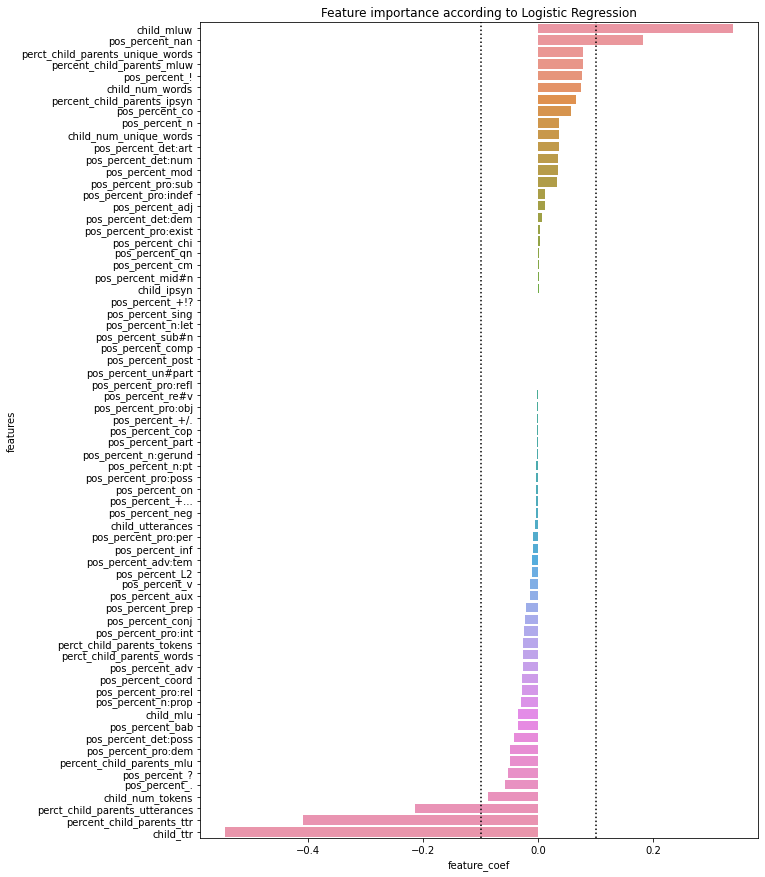

In [ ]:
# create a dataframe with feature importances
df_f_coef = pd.DataFrame(data=lr.coef_, columns=X_train.columns).T
# reset index and rename column
df_f_coef = df_f_coef.reset_index()
df_f_coef = df_f_coef.rename(columns={"index":"features", 0:"feature_coef"})
# create a new column with absolute value of coef
df_f_coef["abs_coef"] = df_f_coef["feature_coef"].apply(lambda x: abs(x))
# define column names
df_f_coef = df_f_coef.sort_values(by="feature_coef", ascending=False, ignore_index=True)

# define figure size
fig = plt.figure(figsize=(10, 15))

# plot
sns.barplot(data=df_f_coef, x="feature_coef", y="features")
# define details
plt.title("Feature importance according to Logistic Regression", loc="center")
plt.axvline(-0.1, linestyle=":", color="black")
plt.axvline(0.1, linestyle=":", color="black")
plt.show()

In [ ]:
# get features whose abs coef is > 0.1
f_selected_lr = df_f_coef.loc[df_f_coef["abs_coef"] > 0.1, "features"].tolist()
f_selected_lr

['child_mluw',
 'pos_percent_nan',
 'perct_child_parents_utterances',
 'percent_child_parents_ttr',
 'child_ttr']

## 10.2 - Feature importance

In [ ]:
# define model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight=None)

# fit model to data
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

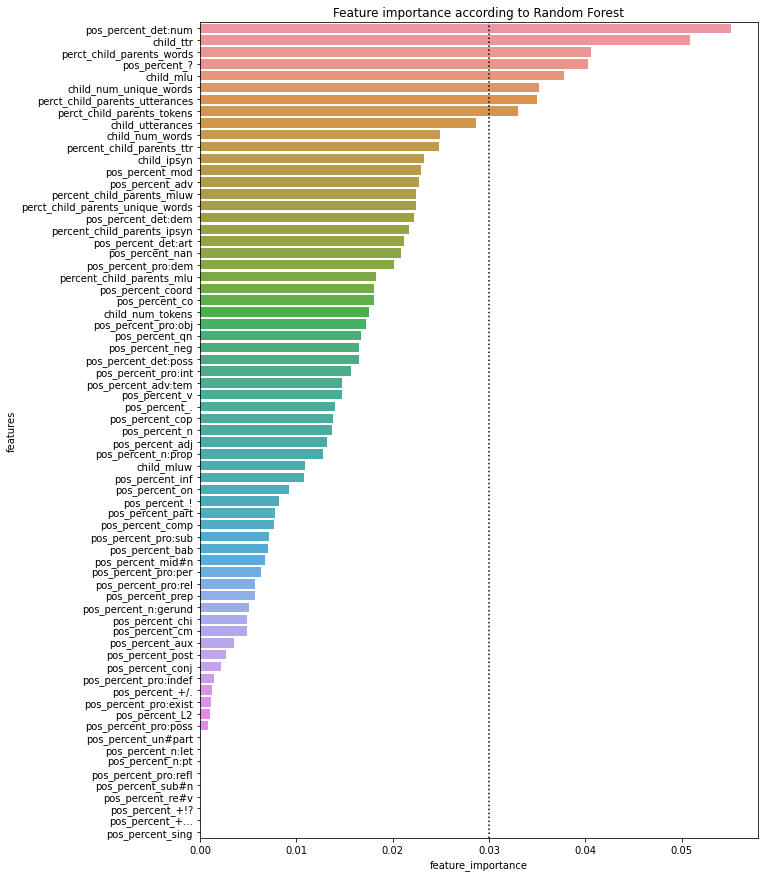

In [ ]:
# create a dataframe with feature importances
df_f_importance = pd.DataFrame(data=rf.feature_importances_, index=X_train.columns)
# reset index and rename column
df_f_importance = df_f_importance.reset_index()
df_f_importance = df_f_importance.rename(columns={"index":"features", 0:"feature_importance"})
# define column names
df_f_importance = df_f_importance.sort_values(by="feature_importance", ascending=False)

# define figure size
fig = plt.figure(figsize=(10, 15))

# plot
sns.barplot(data=df_f_importance, x="feature_importance", y="features")
# define details
plt.title("Feature importance according to Random Forest", loc="center")
plt.axvline(0.03, linestyle=":", color="black")
plt.show()

In [ ]:
# get features whose feature_importance is > 0.03
f_selected_rf = df_f_importance.loc[df_f_importance["feature_importance"] > 0.03, "features"].tolist()
f_selected_rf

['pos_percent_det:num',
 'child_ttr',
 'perct_child_parents_words',
 'pos_percent_?',
 'child_mlu',
 'child_num_unique_words',
 'perct_child_parents_utterances',
 'perct_child_parents_tokens']

## 10.3 - Buruta algorithm

In [ ]:
# install boruta
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 2.1 MB/s eta 0:00:00


In [ ]:
# import required libraries
from boruta import BorutaPy

# define model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight=None)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=seed)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.values, y_train.values)

# get number of selected features
print(
    f"\n{'*'*49}\n\n"
    f"Number of selected features: {feat_selector.n_features_}"
    f"\n\n{'*'*49}\n"
)


*************************************************

Number of selected features: 0

*************************************************



## 10.4 - Mutual Information

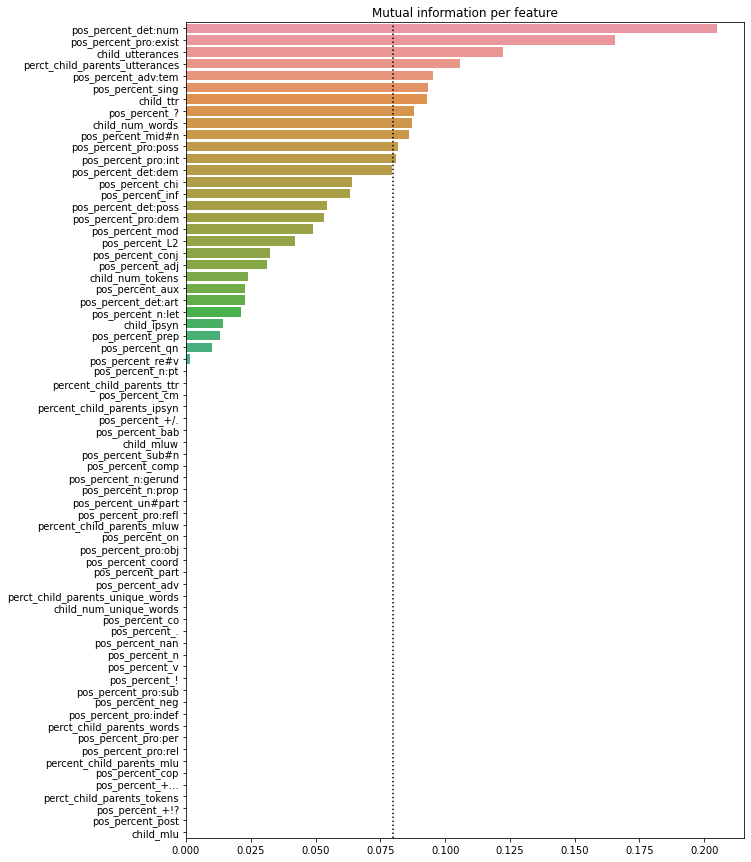

In [ ]:
# calculate mutual information between features and target
mutual_info = mutual_info_classif(X_train, y_train)

# create a series from mutual information
mutual_info_series = pd.Series(mutual_info)
# add column labels as index
mutual_info_series.index=X_train.columns
# sort in descending order
mutual_info_series = mutual_info_series.sort_values(ascending=False)

# define figure size
fig = plt.figure(figsize=(10, 15))

# plot
sns.barplot(y=mutual_info_series.index, x=mutual_info_series)
# define details
plt.title("Mutual information per feature", loc="center")
plt.axvline(0.08, linestyle=":", color="black")
plt.show()

In [ ]:
# get features whose mutual_info_series > 0.075
f_selected_mi = mutual_info_series[mutual_info_series > 0.08].index.tolist()
f_selected_mi

['pos_percent_det:num',
 'pos_percent_pro:exist',
 'child_utterances',
 'perct_child_parents_utterances',
 'pos_percent_adv:tem',
 'pos_percent_sing',
 'child_ttr',
 'pos_percent_?',
 'child_num_words',
 'pos_percent_mid#n',
 'pos_percent_pro:poss',
 'pos_percent_pro:int']

## 10.5 - Final feaures

In [ ]:
# define feature with OR statement
f_or = list((set(f_selected_mi + f_selected_rf + f_selected_lr)))
# print report
print(
    f'\n{"*"*49}\n\n'
    f'Number of feature with OR statement between feature selection methods: {len(f_or)}\n'
)

# define feature with OR statement
f_and = list(set(f_selected_mi) & set(f_selected_rf) & set(f_selected_lr))
# print report
print(
    f'{"*"*49}\n\n'
    f'Number of feature with AND statement between feature selection methods: {len(f_and)}\n'
    f'Selected features are: {f_and}'
    f'\n\n{"*"*49}\n'
)


*************************************************

Number of feature with OR statement between feature selection methods: 19

*************************************************

Number of feature with AND statement between feature selection methods: 2
Selected features are: ['child_ttr', 'perct_child_parents_utterances']

*************************************************



# 11 - Modelling

## 11.1 - Dummy model

*The easiest model without any coding*

## 11.2 - Baseline model

*The fastest model to build*

In [ ]:
# TO-DO

## 11.3 - Best model

*The best model of all*

In [ ]:
# TO-DO

# 12 - Hyper-parameter tuning

*Find out the best hyper-parameters for the ML models*

*What strategy to use*
- Grid Search
- Random search
- Bayesian search
- Optuna

*How ot keep track of model performances?*
- mlflow

In [ ]:
# TO-DO

# 13 - Error Analysis

*Perform error analysis to check model performance*

## 13.1 - Cross-validation

In [ ]:
# TO-DO

In [ ]:
def get_class_metrics(model, y_true, y_pred, y_pred_proba):
    """Get basic classification metrics.
    
    Args
        model: the machine learning model
        y_true: true label for the samples
        y_pred: predicted classes for the samples (model.predict)
        y_pred_proba: predicted probability for the samples (model.predict_proba)

    Return
        tuple with accuracy, precision, recall, f1, roc-auc, precision-recall-auc scores
    
    """

    # get threshold dependent metrics for the given model
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # get probability dependent metrics for the given model
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    precision_, recall_, thresholds = precision_recall_curve(y_true, y_pred_proba)
    precision_recall_auc = auc(recall_, precision_)
    log_loss_ = log_loss(y_true, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc, precision_recall_auc, log_loss_

In [ ]:
# instanciate Leave 2 Out object
lpo = LeavePOut(2)

# print information
print(f'Number of leave 2 out splits: {len([True for _ in lpo.split(X_train_scaled)])}')

# instanciate Leave P Out object
lpo = LeavePOut(1)

# print information
print(f'Number of leave 1 out splits: {len([True for _ in lpo.split(X_train_scaled)])}')

Number of leave 2 out splits: 435
Number of leave 1 out splits: 30


In [ ]:
# # define dict to store metrics
# df_metrics = pd.DataFrame()

# # define possible features
# f_selected_mi
# f_selected_rf
# f_selected_lr
# f_or = list((set(f_selected_mi + f_selected_rf + f_selected_lr)))
# f_and = list(set(f_selected_mi) & set(f_selected_rf) & set(f_selected_lr))

# # define default models to test
# dummy = DummyClassifier(strategy="most_frequent", random_state=seed)
# lr = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=seed)
# svm = SVC(probability=True, max_iter=1000, random_state=seed)
# bayes = BernoulliNB()
# knn = KNeighborsClassifier(n_jobs=-1)
# rf = RandomForestClassifier(n_jobs=-1, random_state=seed)
# lgbm = LGBMClassifier(n_jobs=-1, random_state=seed)
# catboost = CatBoostClassifier(random_seed=seed, verbose=False)

# # iterate over possible feature combinations
# for selected_features, selected_features_label in zip(
#     # available features selected
#     [f_selected_mi, f_selected_rf  , f_selected_lr , f_or, f_and],
#     # features selected labels
#     ["Mutual Info", "Random Forest", "Logistic Reg",  "OR", "AND"]
#     ):

#     # filter training dataframe given the selected features
#     X_train_scaled_f_selected = X_train_scaled[selected_features]

#     # sanity check
#     assert X_train_scaled_f_selected.shape[1] == len(selected_features), "Error of feature selection filtering"

#     # instanciate Leave P Out object
#     lpo = LeavePOut(2)

#     # iterate over models and labels
#     for ml_model, ml_label in zip(
#         # available models will be the "model" iterator
#         [ dummy ,  lr  ,  svm  ,  bayes  ,  knn  ,  rf  ,  lgbm , catboost ],
#         # available labels will be "label" iterator
#         ["Dummy", "lr" , "svm" , "bayes" , "knn" , "rf" , "lgbm", "catboost" ] 
#     ):

#         # iterate over synthetic data generation models and their labels
#         for synthetic_data_model, data_label in zip(
#             # available models will be the "model" iterator
#             [  None  , SMOTE(random_state=0, n_jobs=-1), ADASYN(random_state=0, n_jobs=-1), TomekLinks(n_jobs=-1), NearMiss(n_jobs=-1), RandomOverSampler(random_state=seed)],
#             # available labels will be "label" iterator
#             ["Normal",       "SMOTE"                   ,       "ADASYN"                   ,       "Tomek"        ,      "NearMiss"    ,         "RandomOverSampling"        ]
#         ):

#             # print report
#             print(
#                 f'Performing Leave2Out validation for {ml_label.upper()} model on {data_label.upper()} data with {selected_features_label.upper()} features...'
#             )

#             # get metrics for leave 2 out validation
#             metrics_p_out = {
#                 "accuracy": [],
#                 "precision": [],
#                 "recall": [],
#                 "f1": [],
#                 "roc_auc": [], 
#                 "pr_auc": []
#                 }

#             # iterate over leave 2 out splits
#             for train_index, val_index in lpo.split(X_train_scaled_f_selected):
#                 # sanity check
#                 assert len(set(train_index).intersection(set(val_index))) == 0, "Overlapping train and validation index!"

#                 # ===============================================================
#                 # for the two validation samples, 
#                 # we will always use splits that have 1 ASD and another 1 non-ASD
#                 # ---> sum of y values in validation must be 1
#                 # ---> otherwise both are ASD or both are non-ASD
#                 # ===============================================================

#                 # check if all are ASD or all are non-ASD
#                 if y_train[val_index].sum() != 1: 
#                     # skip to the next iteration
#                     continue
#                 # one is ASD and the other is non-ASD
#                 else:
#                     # get train and validation samples
#                     X_train_p = X_train_scaled_f_selected.iloc[train_index, :]
#                     X_val_p   = X_train_scaled_f_selected.iloc[ val_index , :]
#                     y_train_p = y_train.iloc[train_index]
#                     y_val_p   = y_train.iloc[ val_index ]

#                 # check if we will use synthetic data
#                 if data_label == "Normal":
#                     # keep data as it is
#                     X_train_modelling, y_train_modelling = X_train_p.copy(), y_train_p.copy()
#                 # we will not use normal data
#                 else:
#                     # create modelling data
#                     X_train_modelling, y_train_modelling = synthetic_data_model.fit_resample(X_train_p.copy(), y_train_p.copy())

#                 # fit model to data
#                 ml_model.fit(X_train_modelling, y_train_modelling)

#                 # get classification metrics
#                 accuracy, precision, recall, f1, roc_auc, pr_auc = get_class_metrics(
#                     ml_model, 
#                     y_val_p, 
#                     ml_model.predict(X_val_p), 
#                     ml_model.predict_proba(X_val_p)[:, 1]
#                     )
                
#                 # get metrics for the given model
#                 metrics_p_out["accuracy"].append(accuracy)
#                 metrics_p_out["precision"].append(precision)
#                 metrics_p_out["recall"].append(recall)
#                 metrics_p_out["f1"].append(f1)
#                 metrics_p_out["roc_auc"].append(roc_auc)
#                 metrics_p_out["pr_auc"].append(pr_auc)

#             # create a dataframe with iteration metrics
#             df_ = pd.DataFrame({
#                 "model": ml_label,
#                 "data": data_label,
#                 "features": selected_features_label,
#                 "pr_auc": np.mean(metrics_p_out["pr_auc"]),
#                 "roc_auc": np.mean(metrics_p_out["roc_auc"]),
#                 "f1": np.mean(metrics_p_out["f1"]),
#                 "recall": np.mean(metrics_p_out["recall"]),
#                 "precision": np.mean(metrics_p_out["precision"]),
#                 "accuracy": np.mean(metrics_p_out["accuracy"])
#             }, index=[0])

#             # add metrics to df_metricvalues to 
#             df_metrics = pd.concat(objs=[df_metrics, df_], ignore_index=True)

# # order values by best performance metrics
# df_metrics = df_metrics.sort_values(
#     by=["pr_auc", "f1", "roc_auc", "recall", "precision", "accuracy"], 
#     ascending=[False, False, False, False, False, False], 
#     ignore_index=True
# )

# # save results to html
# df_metrics.to_html(
#     buf="metrics_experimentation_asd_predictor.html", 
#     max_rows=df_metrics.shape[0], max_cols=25, justify="center"
#     )

# # check results
# pd.read_html("metrics_experimentation_asd_predictor.html")[0].head(20)

In [ ]:
def explore_features_models_synthetic_data(
    X_train, 
    y_train, 
    zip_features_label, 
    zip_model_label, 
    zip_synthetic_data_label
):

    # unpack zips
    zip_features_label = [*zip_features_label]
    zip_model_label = [*zip_model_label]
    zip_synthetic_data_label = [*zip_synthetic_data_label]

    # define dict to store metrics
    df_metrics = pd.DataFrame()

    # iterate over possible feature combinations
    for selected_features, selected_features_label in zip_features_label:

        # filter training dataframe given the selected features
        X_train_f_selected = X_train[selected_features]

        # sanity check
        assert X_train_f_selected.shape[1] == len(selected_features), "Error of feature selection filtering"

        # instanciate Leave P Out object
        lpo = LeavePOut(2)

        # iterate over models and labels
        for ml_model, ml_label in zip_model_label:

            # iterate over synthetic data generation models and their labels
            for synthetic_data_model, data_label in zip_synthetic_data_label:

                # print report
                print(
                    f'Performing Leave2Out validation for {ml_label.upper()} model on {data_label.upper()} data with {selected_features_label.upper()} features...'
                )

                # get metrics for leave 2 out validation
                metrics_p_out = {
                    "pr_auc": [],
                    "roc_auc": [], 
                    "log_loss": [],
                    "f1": [],
                    "recall": [],
                    "precision": [],
                    "accuracy": []
                    }

                # iterate over leave 2 out splits
                for train_index, val_index in lpo.split(X_train_f_selected):
                    # sanity check
                    assert len(set(train_index).intersection(set(val_index))) == 0, "Overlapping train and validation index!"

                    # ===============================================================
                    # for the two validation samples, 
                    # we will always use splits that have 1 ASD and another 1 non-ASD
                    # ---> sum of y values in validation must be 1
                    # ---> otherwise both are ASD or both are non-ASD
                    # ===============================================================

                    # check if all are ASD or all are non-ASD
                    if y_train[val_index].sum() != 1: 
                        # skip to the next iteration
                        continue
                    # one is ASD and the other is non-ASD
                    else:
                        # get train and validation samples
                        X_train_p = X_train_f_selected.iloc[train_index, :]
                        X_val_p   = X_train_f_selected.iloc[ val_index , :]
                        y_train_p = y_train.iloc[train_index]
                        y_val_p   = y_train.iloc[ val_index ]

                    # check if we will use synthetic data
                    if data_label == "Normal":
                        # keep data as it is
                        X_train_modelling, y_train_modelling = X_train_p.copy(), y_train_p.copy()
                    # we will not use normal data
                    else:
                        # create modelling data
                        X_train_modelling, y_train_modelling = synthetic_data_model.fit_resample(X_train_p.copy(), y_train_p.copy())

                    # fit model to data
                    ml_model.fit(X_train_modelling, y_train_modelling)

                    # get classification metrics
                    accuracy, precision, recall, f1, roc_auc, pr_auc, log_loss = get_class_metrics(
                        ml_model, 
                        y_val_p, 
                        ml_model.predict(X_val_p), 
                        ml_model.predict_proba(X_val_p)[:, 1]
                        )

                    # get metrics for the given model
                    metrics_p_out["accuracy"].append(accuracy)
                    metrics_p_out["precision"].append(precision)
                    metrics_p_out["recall"].append(recall)
                    metrics_p_out["f1"].append(f1)
                    metrics_p_out["roc_auc"].append(roc_auc)
                    metrics_p_out["pr_auc"].append(pr_auc)
                    metrics_p_out["log_loss"].append(log_loss)

                # create a dataframe with iteration metrics
                df_ = pd.DataFrame({
                    "model": ml_label,
                    "data": data_label,
                    "features": selected_features_label,
                    "pr_auc_mean": np.mean(metrics_p_out["pr_auc"]),
                    "roc_auc_mean": np.mean(metrics_p_out["roc_auc"]),
                    "log_loss_mean": np.mean(metrics_p_out["log_loss"]),
                    "f1_mean": np.mean(metrics_p_out["f1"]),
                    "recall_mean": np.mean(metrics_p_out["recall"]),
                    "precision_mean": np.mean(metrics_p_out["precision"]),
                    "accuracy_mean": np.mean(metrics_p_out["accuracy"]),
                    "pr_auc_std": np.std(metrics_p_out["pr_auc"], ddof=1),
                    "roc_auc_std": np.std(metrics_p_out["roc_auc"], ddof=1),
                    "log_loss_std": np.std(metrics_p_out["log_loss"], ddof=1),
                    "f1_std": np.std(metrics_p_out["f1"], ddof=1),
                    "recall_std": np.std(metrics_p_out["recall"], ddof=1),
                    "precision_std": np.std(metrics_p_out["precision"], ddof=1),
                    "accuracy_std": np.std(metrics_p_out["accuracy"], ddof=1)
                }, index=[0])

                # add metrics to df_metricvalues to 
                df_metrics = pd.concat(objs=[df_metrics, df_], ignore_index=True)

    # order values by best performance metrics
    df_metrics = df_metrics.sort_values(
        by=["pr_auc_mean", "roc_auc_mean", "log_loss_mean", "f1_mean", "recall_mean", "precision_mean", "accuracy_mean"], 
        ascending=[False, False, False, False, False, False, False], 
        ignore_index=True
    )

    return df_metrics

In [ ]:
# # define possible features
# f_selected_mi
# f_selected_rf
# f_selected_lr
# f_or = list((set(f_selected_mi + f_selected_rf + f_selected_lr)))
# f_and = list(set(f_selected_mi) & set(f_selected_rf) & set(f_selected_lr))

# # define possible features to test
# zip_features_label = zip(
#     # available features selected
#     [f_selected_mi, f_selected_rf  , f_selected_lr , f_or, f_and],
#     # features selected labels
#     ["Mutual Info", "Random Forest", "Logistic Reg",  "OR", "AND"]
#     )

# # define possible models to test
# dummy = DummyClassifier(strategy="most_frequent", random_state=seed)
# lr = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=seed)
# svm = SVC(probability=True, max_iter=1000, random_state=seed)
# bayes = BernoulliNB()
# knn = KNeighborsClassifier(n_jobs=-1)
# rf = RandomForestClassifier(n_jobs=-1, random_state=seed)
# lgbm = LGBMClassifier(n_jobs=-1, random_state=seed)
# catboost = CatBoostClassifier(random_seed=seed, verbose=False)

# zip_model_label = zip(
#         # available models will be the "model" iterator
#         [ dummy ,  lr  ,  svm  ,  bayes  ,  knn  ,  rf  ,  lgbm , catboost ],
#         # available labels will be "label" iterator
#         ["Dummy", "lr" , "svm" , "bayes" , "knn" , "rf" , "lgbm", "catboost" ] 
#     )

# # define possible synthetic data generation techniques
# zip_synthetic_data_label = zip(
#             # available models will be the "model" iterator
#             [  None  , SMOTE(random_state=0, n_jobs=-1), ADASYN(random_state=0, n_jobs=-1), TomekLinks(n_jobs=-1), NearMiss(n_jobs=-1), RandomOverSampler(random_state=seed)],
#             # available labels will be "label" iterator
#             ["Normal",       "SMOTE"                   ,       "ADASYN"                   ,       "Tomek"        ,      "NearMiss"    ,         "RandomOverSampling"        ]
#         )

# # make experiments
# df_metrics = explore_features_models_synthetic_data(
#     X_train=X_train_scaled, 
#     y_train=y_train, 
#     zip_features_label=zip_features_label, 
#     zip_model_label=zip_model_label, 
#     zip_synthetic_data_label=zip_synthetic_data_label
#     )

# # save results to html
# df_metrics.to_html(
#     buf="metrics_experimentation_asd_predictor.html", 
#     max_rows=df_metrics.shape[0], max_cols=25, justify="center"
#     )

In [ ]:
# # make experiments 
# df_metrics = explore_features_models_synthetic_data(
#     X_train=X_train_scaled, 
#     y_train=y_train, 
#     zip_features_label=zip([f_selected_mi, f_or, f_and], ["Mutual Info", "OR", "AND"]), 
#     zip_model_label=zip([ DummyClassifier(strategy="most_frequent", random_state=seed) ,  KNeighborsClassifier(n_jobs=-1)], ["Dummy", "knn"]), 
#     zip_synthetic_data_label=zip([  None  , ADASYN(random_state=0, n_jobs=-1), NearMiss(n_jobs=-1)], ["Normal", "ADASYN","NearMiss"])
#     )

# # inspect results
# df_metrics

## 13.2 - Overfitting vs Wellfitting vs Underfitting

In [ ]:
# TO-DO

In [ ]:
def explore_stratified_cv(
    X_train, 
    y_train, 
    zip_features_label, 
    zip_model_label, 
    zip_synthetic_data_label
):

    # unpack zips
    zip_features_label = [*zip_features_label]
    zip_model_label = [*zip_model_label]
    zip_synthetic_data_label = [*zip_synthetic_data_label]

    # define dict to store metrics
    df_metrics = pd.DataFrame()

    # iterate over possible feature combinations
    for selected_features, selected_features_label in zip_features_label:

        # filter training dataframe given the selected features
        X_train_f_selected = X_train[selected_features]

        # sanity check
        assert X_train_f_selected.shape[1] == len(selected_features), "Error of feature selection filtering"

        # instanciate Leave P Out object
        lpo = LeavePOut(2)

        # iterate over models and labels
        for ml_model, ml_label in zip_model_label:

            # iterate over synthetic data generation models and their labels
            for synthetic_data_model, data_label in zip_synthetic_data_label:

                # print report
                print(
                    f'Performing Leave2Out validation for {ml_label.upper()} model on {data_label.upper()} data with {selected_features_label.upper()} features...'
                )

                # check if we will use synthetic data
                if data_label == "Normal":
                    # keep data as it is
                    X_train_modelling, y_train_modelling = X_train_f_selected.copy(), y_train.copy()
                # we will not use normal data
                else:
                    # create modelling data
                    X_train_modelling, y_train_modelling = synthetic_data_model.fit_resample(X_train_f_selected.copy(), y_train.copy())

                # define metrics
                metrics = ["roc_auc", "f1", "recall", "precision", "accuracy", "neg_log_loss"]

                # cross validate model
                cv_data = cross_validate(
                    estimator=ml_model, 
                    X=X_train_modelling, 
                    y=y_train_modelling, 
                    # groups=None, 
                    scoring=metrics, 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed), 
                    return_train_score=True,
                    n_jobs=-1, 
                    verbose=0
                    )

                # iterate over metrics
                for metric in metrics:
                    # create a new key for division of test and train metric
                    cv_data[f"test_divided_train_{metric}"] = cv_data[f"test_{metric}"] / cv_data[f"train_{metric}"]

                # create a dict to store mean and std for k-fold metrics
                cv_data_agg = {}

                # iterate over cv_data dict
                for k, v in cv_data.items():
                    # check if key is not time
                    if not k.endswith("_time"):
                        # create a mean and std for the given metric
                        cv_data_agg[f"mean_{k}"] = np.mean(v)
                        cv_data_agg[f"std_{k}"] = np.std(v, ddof=1)

                # add metadata info to dict
                cv_data_agg["model"]=ml_label
                cv_data_agg["data"]=data_label
                cv_data_agg["features"]=selected_features_label

                # create a dataframe with iteration metrics
                df_ = pd.DataFrame(cv_data_agg, index=[0])

                # add metrics to df_metricvalues to 
                df_metrics = pd.concat(objs=[df_metrics, df_], ignore_index=True)

    # reorder columns
    df_metrics = df_metrics[[
        'model', 'data', 'features', 

        'mean_test_divided_train_roc_auc',
        'mean_test_divided_train_f1', 
        'mean_test_divided_train_recall',      
        'mean_test_divided_train_precision',
        'mean_test_divided_train_accuracy',
        'mean_test_divided_train_neg_log_loss',

        'mean_test_roc_auc', 'std_test_roc_auc',
        'mean_train_roc_auc', 'std_train_roc_auc', 
        'mean_test_f1', 'std_test_f1', 
        'mean_train_f1', 'std_train_f1', 
        'mean_test_recall','std_test_recall', 
        'mean_train_recall', 'std_train_recall',
        'mean_test_precision', 'std_test_precision', 
        'mean_train_precision', 'std_train_precision', 
        'mean_test_accuracy', 'std_test_accuracy',
        'mean_train_accuracy', 'std_train_accuracy', 
        'mean_test_neg_log_loss', 'std_test_neg_log_loss', 
        'mean_train_neg_log_loss', 'std_train_neg_log_loss',        

        'std_test_divided_train_roc_auc', 
        'std_test_divided_train_f1', 
        'std_test_divided_train_recall',
        'std_test_divided_train_precision',
        'std_test_divided_train_accuracy',
        'std_test_divided_train_neg_log_loss'        
       ]]

    # order values by best performance metrics
    df_metrics = df_metrics.sort_values(
        by=["mean_test_divided_train_roc_auc", "mean_test_divided_train_neg_log_loss", "mean_test_divided_train_f1"],
        ascending=[False, False, False], 
        ignore_index=True
    )

    return df_metrics

In [ ]:
# define possible features
f_selected_mi
f_selected_rf
f_selected_lr
f_or = list((set(f_selected_mi + f_selected_rf + f_selected_lr)))
f_and = list(set(f_selected_mi) & set(f_selected_rf) & set(f_selected_lr))

# define possible features to test
zip_features_label = zip(
    # available features selected
    [f_selected_mi, f_selected_rf  , f_selected_lr , f_or, f_and],
    # features selected labels
    ["Mutual Info", "Random Forest", "Logistic Reg",  "OR", "AND"]
    )

# define possible models to test
dummy = DummyClassifier(strategy="most_frequent", random_state=seed)
lr = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=seed)
svm = SVC(probability=True, max_iter=1000, random_state=seed)
bayes = BernoulliNB()
knn = KNeighborsClassifier(n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1, random_state=seed)
lgbm = LGBMClassifier(n_jobs=-1, random_state=seed)
catboost = CatBoostClassifier(random_seed=seed, verbose=False)

zip_model_label = zip(
        # available models will be the "model" iterator
        [ dummy ,  lr  ,  svm  ,  bayes  ,  knn  ,  rf  ,  lgbm , catboost ],
        # available labels will be "label" iterator
        ["Dummy", "lr" , "svm" , "bayes" , "knn" , "rf" , "lgbm", "catboost" ] 
    )

# define possible synthetic data generation techniques
zip_synthetic_data_label = zip(
            # available models will be the "model" iterator
            [  None  , SMOTE(random_state=0, n_jobs=-1), ADASYN(random_state=0, n_jobs=-1), TomekLinks(n_jobs=-1), NearMiss(n_jobs=-1), RandomOverSampler(random_state=seed)],
            # available labels will be "label" iterator
            ["Normal",       "SMOTE"                   ,       "ADASYN"                   ,       "Tomek"        ,      "NearMiss"    ,         "RandomOverSampling"        ]
        )

# make experiments
df_metrics = explore_stratified_cv(
    X_train=X_train_scaled, 
    y_train=y_train, 
    zip_features_label=zip_features_label, 
    zip_model_label=zip_model_label, 
    zip_synthetic_data_label=zip_synthetic_data_label
    )

# save results to html
df_metrics.to_html(
    buf="teste.html", 
    max_rows=df_metrics.shape[0], max_cols=100, justify="center"
    )    

Performing Leave2Out validation for DUMMY model on NORMAL data with OR features...


invalid value encountered in true_divide
invalid value encountered in true_divide


Performing Leave2Out validation for DUMMY model on SMOTE data with OR features...
Performing Leave2Out validation for DUMMY model on ADASYN data with OR features...


invalid value encountered in true_divide


Performing Leave2Out validation for LR model on NORMAL data with OR features...
Performing Leave2Out validation for LR model on SMOTE data with OR features...
Performing Leave2Out validation for LR model on ADASYN data with OR features...
Performing Leave2Out validation for BAYES model on NORMAL data with OR features...
Performing Leave2Out validation for BAYES model on SMOTE data with OR features...
Performing Leave2Out validation for BAYES model on ADASYN data with OR features...
Performing Leave2Out validation for KNN model on NORMAL data with OR features...
Performing Leave2Out validation for KNN model on SMOTE data with OR features...
Performing Leave2Out validation for KNN model on ADASYN data with OR features...
Performing Leave2Out validation for DUMMY model on NORMAL data with AND features...
Performing Leave2Out validation for DUMMY model on SMOTE data with AND features...


invalid value encountered in true_divide
invalid value encountered in true_divide


Performing Leave2Out validation for DUMMY model on ADASYN data with AND features...
Performing Leave2Out validation for LR model on NORMAL data with AND features...


invalid value encountered in true_divide


Performing Leave2Out validation for LR model on SMOTE data with AND features...
Performing Leave2Out validation for LR model on ADASYN data with AND features...
Performing Leave2Out validation for BAYES model on NORMAL data with AND features...
Performing Leave2Out validation for BAYES model on SMOTE data with AND features...


invalid value encountered in true_divide


Performing Leave2Out validation for BAYES model on ADASYN data with AND features...
Performing Leave2Out validation for KNN model on NORMAL data with AND features...
Performing Leave2Out validation for KNN model on SMOTE data with AND features...
Performing Leave2Out validation for KNN model on ADASYN data with AND features...


In [ ]:
df_metrics[["model", "data", "features", "mean_test_divided_train_f1", "mean_test_f1", "std_test_f1"]]

,model,data,features,mean_test_divided_train_f1,mean_test_f1,std_test_f1
0,lr,Normal,AND,0.800,0.400,0.516
1,bayes,Normal,AND,NaN,0.233,0.387
2,lr,ADASYN,AND,0.954,0.600,0.274
3,bayes,ADASYN,AND,0.972,0.647,0.347
4,Dummy,ADASYN,AND,NaN,0.600,0.211
5,Dummy,Normal,OR,NaN,0.000,0.000
6,Dummy,Normal,AND,NaN,0.000,0.000
7,Dummy,SMOTE,OR,NaN,0.000,0.000
8,Dummy,ADASYN,OR,NaN,0.000,0.000
9,Dummy,SMOTE,AND,NaN,0.000,0.000


## 13.3 - Confusion Matrix

In [ ]:
# TO-DO

## 13.4 - Learning Curves

In [ ]:
# define training dataset -> X_train_scaled with mutual information features
# X_train_final = X_train_scaled[f_selected_mi]
# X_train_final = X_train_scaled[f_or]
X_train_final = X_train_scaled[f_and]

# define model to generate synthetic data
data_model = SMOTE(random_state=0, n_jobs=-1)
# data_model = RandomOverSampler(random_state=seed)

# generate synthetic data
X_train_modelling, y_train_modelling = data_model.fit_resample(
    X_train_final, y_train
    )

# define ML model
# ml_model = CatBoostClassifier(random_seed=seed, verbose=False)
# ml_model = KNeighborsClassifier(n_jobs=-1)
# ml_model = RandomForestClassifier(n_jobs=-1, random_state=seed)
# ml_model = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=seed, C=0.1)
ml_model = BernoulliNB()

In [ ]:
# define metrics
metrics = ["f1", "recall", "precision"]

# cross validate model
cv_data = cross_validate(
    estimator=ml_model, 
    X=X_train_modelling, 
    y=y_train_modelling, 
    groups=None, 
    scoring=metrics, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed), 
    return_train_score=True,
    n_jobs=-1, 
    verbose=0
    )

# iterate over metrics
for metric in metrics:
    # create a new key for division of test and train metric
    cv_data[f"test_divided_train_{metric}"] = cv_data[f"test_{metric}"] / cv_data[f"train_{metric}"]

# print report
print(
    f'STRATIFIED CROSS VALIDATION:\n'
)

# iterate over cv_data
for k, v in cv_data.items():
    # check if key is time or metric
    if not k.endswith("_time"):
        # print metric
        print(
            f"\t{k}: {np.mean(v):.2f} +-{np.std(v, ddof=1):.2f}"
        )

STRATIFIED CROSS VALIDATION:

	test_f1: 0.71 +-0.31
	train_f1: 0.73 +-0.03
	test_recall: 0.80 +-0.35
	train_recall: 0.80 +-0.04
	test_precision: 0.65 +-0.31
	train_precision: 0.67 +-0.02
	test_divided_train_f1: 0.99 +-0.45
	test_divided_train_recall: 1.02 +-0.46
	test_divided_train_precision: 0.99 +-0.49


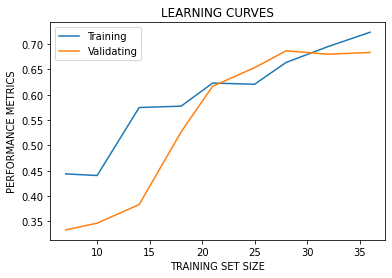

In [ ]:
# check learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(n_jobs=-1, max_iter=1000, random_state=seed, C=0.1), 
    X=X_train_modelling, y=y_train_modelling, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed),
    scoring="f1", n_jobs=-1, shuffle=True, random_state=seed
    )

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot learning curves
sns.lineplot(x = train_sizes, y = train_scores_mean, 
             estimator='mean', ci=95, n_boot=1000, label = "Training")
sns.lineplot(x = train_sizes, y = test_scores_mean, 
             estimator='mean', ci=95, n_boot=1000, label = "Validating")
# define plot details
plt.ylabel('PERFORMANCE METRICS')
plt.xlabel('TRAINING SET SIZE')
plt.title('LEARNING CURVES')
plt.legend();

## 13.5 - Model Calibration

In [ ]:
# TO-DO

# 14 - Model Performance

*Evaluate model performance*

## 14.1 - Training performance

*Evaluate model performance on training dataset*

In [ ]:
# define training dataset -> X_train_scaled with mutual information features
X_train_final = X_train_scaled[f_and]

# define model to generate synthetic data
data_model = SMOTE(random_state=0, n_jobs=-1)

# generate synthetic data
X_train_modelling, y_train_modelling = data_model.fit_resample(
    X_train_final, y_train
    )

# define ML model
ml_model = BernoulliNB()

# fit model to data
ml_model.fit(X_train_modelling, y_train_modelling)

BernoulliNB()

Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).


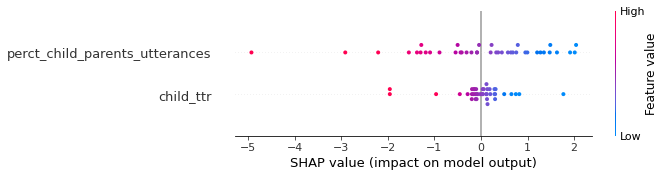

In [ ]:
# compute SHAP values
explainer = shap.Explainer(ml_model, X_train_modelling)
shap_values = explainer(X_train_modelling)

# plot shap values for features
shap.plots.beeswarm(shap_values, order=shap_values.abs.mean(0), max_display=10)

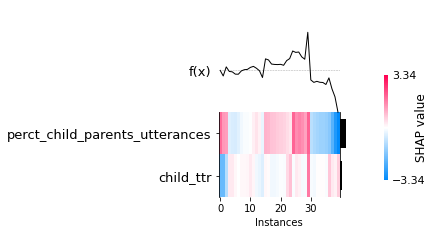

In [ ]:
# plot heatmap
shap.plots.heatmap(shap_values[:1000], max_display=10, feature_values=shap.Explanation.abs.mean(0))

## 14.2 - Validation performance

*Evaluate model performance on validation dataset*

In [ ]:
# TO-DO

In [ ]:
# TO-DO

## 14.1 - Test performance

*Evaluate model performance on test dataset*

In [ ]:
# TO-DO

# 15 - Model diagnostics

## 15.1 - Feature importance

*Check the importance of features for model prediciton*

In [ ]:
# TO-DO

## 15.2 - Bias analysis

*Check for bias on model predictions*

In [ ]:
# TO-DO

## 15.3 - Uncertainty analysis

*Check for uncertainty on model predictions*

In [ ]:
# TO-DO

## 15.4 - SHAP values

*Inspect shap values for model prediction*

In [ ]:
# # TO-DO

# # explain the GAM model with SHAP
# explainer_ebm = shap.Explainer(model_ebm.predict, X100)
# shap_values_ebm = explainer_ebm(X)

# shap.plots.beeswarm(shap_values_ebm)

# 16 - Prepare model for production

In [ ]:
# TO-DO